In [214]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
train_users = pd.read_csv('train_users.csv', header=0)
test_users = pd.read_csv('test_users.csv', header=0)

In [216]:
#We can see from below that we need to clean up some of the data
train_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


In [217]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.6+ MB


In [218]:
#We will begin cleaning the age so let's look at the distribution of age of users
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

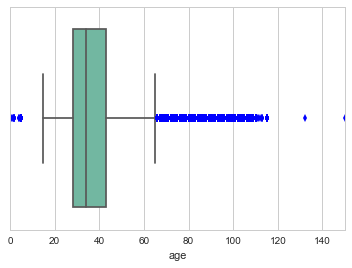

In [219]:
#Can see from this boxplot again that there are a lot of outliers
g = sns.boxplot('age', data=train_users, orient="h", palette="Set2").set(xlim=(0, 150))

In [220]:
"""There was clearly an error with the above ages. Airbnb policy states that all those who create an account must
be over 18. And unless they have found the next Dorian Gray, we will assume all ages over 100 were a mistake""" 
train_users["age"][train_users["age"] > 100] = np.NaN
train_users["age"][train_users["age"] < 18] = np.NaN

/Users/CL/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/CL/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [221]:
average_age_train = int(train_users["age"].mean())
average_age_train

36

In [222]:
#replace NaN values with average age
train_users = train_users.fillna({'age': 36})

In [223]:
#Lets look at the ages of those in the test set
test_users['age'].describe()

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

In [224]:
#remove those over 100 and under 18
test_users["age"][test_users["age"] > 100] = np.NaN
test_users["age"][test_users["age"] < 18] = np.NaN

/Users/CL/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/CL/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [225]:
average_age_test = int(test_users["age"].mean())
average_age_test

34

In [226]:
#put average ages in null values:
test_users = test_users.fillna({'age': 34})

In [227]:
#Divide date_account_created into year and month

def year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

# Create Year and Month columns for account created
train_users['account_year']  = train_users['date_account_created'].apply(year)
train_users['account_month']  = train_users['date_account_created'].apply(month)

# convert type to integer
train_users[['account_year', 'account_month']] = train_users[['account_year', 'account_month']].astype(int)

#Do the same for test set:
test_users['account_year']  = test_users['date_account_created'].apply(year)
test_users['account_month']  = test_users['date_account_created'].apply(month)

# convert type to integer
test_users[['account_year', 'account_month']] = test_users[['account_year', 'account_month']].astype(int)

In [228]:
#remove date_account_created
train_users = train_users.drop(['date_account_created'], axis=1)
test_users = test_users.drop(['date_account_created', 'date_first_booking'], axis=1)

In [229]:
#Fill NaN values for first_affiliate_tracked with 'unknown'
train_users = train_users.fillna({'first_affiliate_tracked': 'unknown'})
test_users = test_users.fillna({'first_affiliate_tracked': 'unknown'})

In [230]:
#Let's look at the those users who have booked with Airbnb
booked_users = train_users.dropna(subset=['date_first_booking'], how='all')

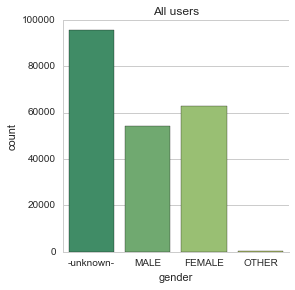

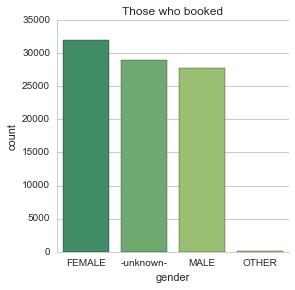

In [231]:
"""This is interesting. The first plot shows the genders of all users on Airbnb while the second shows the
genders that are most likely to book. Suprisingly those that do not wish to reveal their gender have a high rate of 
booking so will we keep these three groups separate. We can assume that 'Other' is also unknown and put these under one title"""
sns.factorplot('gender', data=train_users, kind="count", palette='summer')
sns.plt.title('All users')
sns.factorplot('gender', data=booked_users, kind="count", palette='summer')
sns.plt.title('Those who booked')

In [232]:
#Combine 'unkown and 'OTHER'
booked_users = booked_users.replace({'-unknown-': 'OTHER'}, regex=True)
train_users = train_users.replace({'-unknown-': 'OTHER'}, regex=True)
test_users = test_users.replace({'-unknown-': 'OTHER'}, regex=True)

In [233]:
# Create Year and Month columns for bookings made
booked_users['booked_year']  = booked_users['date_first_booking'].apply(year)
booked_users['booked_month']  = booked_users['date_first_booking'].apply(month)

# convert type to integer
booked_users[['booked_year', 'booked_month']] = booked_users[['booked_year', 'booked_month']].astype(int)
train_users = train_users.drop(['date_first_booking'], axis=1)

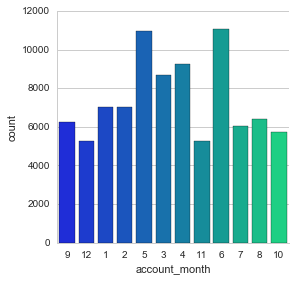

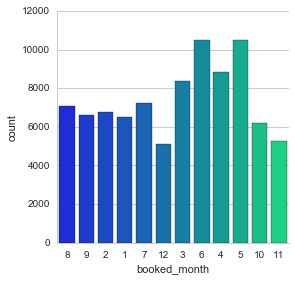

In [234]:
#We can see the most popular months an account is created and a holiday booked. Proably because these are done simultaneously
#Clearly the summer months are the most popular for bookings
sns.factorplot(x='account_month', data=booked_users, kind='count', palette='winter')
sns.factorplot(x='booked_month', data=booked_users, kind='count', palette='winter')

In [235]:
month_dict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
booked_users['booked_month'] = booked_users['booked_month'].map(month_dict)

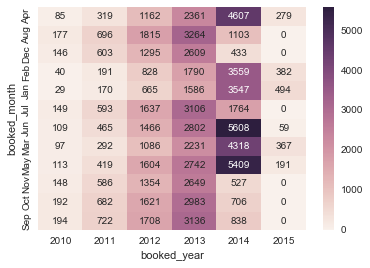

In [236]:
time_of_booking = booked_users.pivot_table('gender', 'booked_month', 'booked_year', aggfunc=len, fill_value=0,)
sns.heatmap(time_of_booking, annot=True, fmt='d')

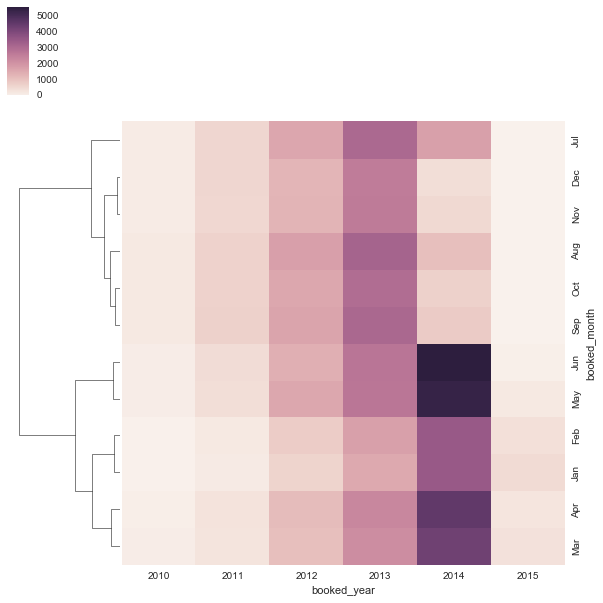

In [237]:
sns.clustermap(time_of_booking, col_cluster=False)

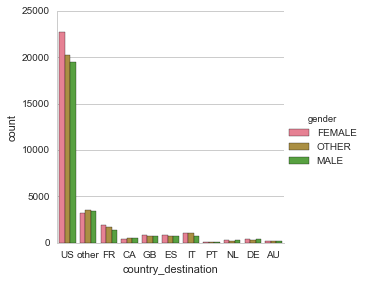

In [238]:
#most popular holiday destinations booked by genders
sns.factorplot(x='country_destination', hue='gender', data=booked_users, kind='count')

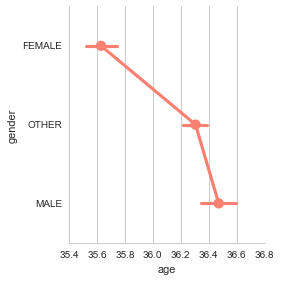

In [239]:
#Females are almost a year younger than males or perhaps slightly older women are less likely to provide their gender
sns.factorplot('age','gender', data=booked_users, color='salmon')

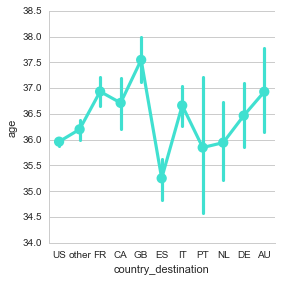

In [240]:
#Older people tend to go to Great Britain while younger people go to Spain
sns.factorplot('country_destination','age', data=booked_users, color='turquoise')